In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
#load x data
x = pd.read_table("x_new.txt", header=None)
x = x.drop(0, axis=1)
x.columns = ["x", "xbar"]
x.head()

,x,xbar
0,-0.146544,0.173105
1,1.310960,0.456811
2,0.014757,0.288142
3,1.224845,0.223004
4,1.257886,0.149518


In [3]:
#load y data
y = pd.read_table("y_new.txt", header=None)
y = y.drop(0, axis=1)
y.columns = ["y", "ybar"]
y.head()

,y,ybar
0,1.751110,0.124445
1,1.991307,0.076120
2,1.513685,0.359281
3,1.466613,0.415392
4,1.975774,0.186732


In [5]:
#calculate z as function of x and y
# z = tanh(x^2) + e^y
z = np.tanh(x["x"]**2) + np.exp(y["y"])

# dz/dx = 2x sech^2(x) 
dzdx =  (2 * x["x"]) / (np.cosh(x["x"])**2)

# dz/dy = e^y
dzdy = np.exp(y["y"])

#zbar = |dz/dx| xbar + |dz/dy| y bar
zbar = abs(dzdx)* x["xbar"] + abs(dzdy) * y["ybar"]

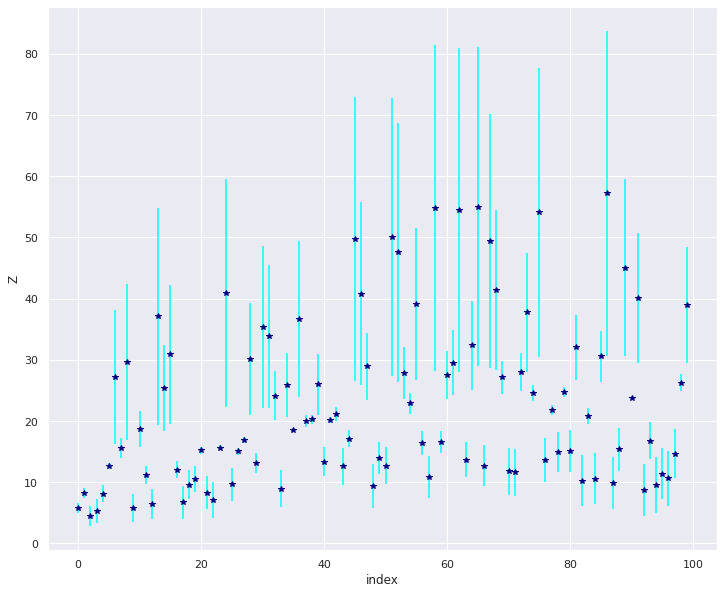

In [19]:
fig = plt.figure(figsize=(12,10))
plt.errorbar(x=range(len(z)), y=z, yerr=zbar, color = "navy", marker = "*", ls="", ecolor="cyan")
plt.xlabel("index")
plt.ylabel("Z")
plt.savefig("Z.jpeg")